In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Read the data from .txt file
# For MacOS
df = pd.read_table('/Users/gmkim/Desktop/ML_Learning/ML_Assignments/Logistic_Regression/ex2data1.txt',sep=',',header=None,names=['Exam1','Exam2','Admission'])

In [ ]:
# For Linux
df = pd.read_table('/home/gmkim/Desktop/ML_Learning/ML_Assignments/Logistic_Regression/ex2data1.txt',sep=',',header=None,names=['Exam1','Exam2','Admission'])

In [3]:
print(df)
print(df.shape)
print(len(df.index))

        Exam1      Exam2  Admission
0   34.623660  78.024693          0
1   30.286711  43.894998          0
2   35.847409  72.902198          0
3   60.182599  86.308552          1
4   79.032736  75.344376          1
..        ...        ...        ...
95  83.489163  48.380286          1
96  42.261701  87.103851          1
97  99.315009  68.775409          1
98  55.340018  64.931938          1
99  74.775893  89.529813          1

[100 rows x 3 columns]
(100, 3)
100


In [7]:
x_vec = df[['Exam1','Exam2']]
x_vec = (x_vec - x_vec.mean()) / x_vec.std()
x0 = np.ones((x_vec.shape[0],1))
x_vec = np.concatenate((x0,x_vec),axis=1)
y = df['Admission']
print(x_vec)
print(y)

[[ 1.         -1.59421626  0.63514139]
 [ 1.         -1.81710142 -1.20148852]
 [ 1.         -1.53132516  0.35948329]
 [ 1.         -0.28068724  1.08092281]
 [ 1.          0.68806193  0.49090485]
 [ 1.         -1.05667395 -0.53305397]
 [ 1.         -0.23319754  1.62997263]
 [ 1.          0.48208266 -1.05839822]
 [ 1.          0.53727995  1.14076409]
 [ 1.          0.96558389 -1.22094762]
 [ 1.          1.55293123 -1.50659457]
 [ 1.          0.48151286 -1.91675998]
 [ 1.          0.85633616  0.5521221 ]
 [ 1.          0.19119499  1.69493955]
 [ 1.         -1.34164029  0.528167  ]
 [ 1.         -0.59991204  1.23691656]
 [ 1.          0.17606285 -0.72548489]
 [ 1.          0.11833462 -1.05169521]
 [ 1.          0.25784655  1.43709044]
 [ 1.          0.58250489 -1.00340376]
 [ 1.          0.08879298 -1.25834541]
 [ 1.          1.23508208 -0.02274321]
 [ 1.         -0.77650905 -0.93453099]
 [ 1.         -1.61536921 -1.18456258]
 [ 1.          0.63108629  0.14800592]
 [ 1.         -0.17335912

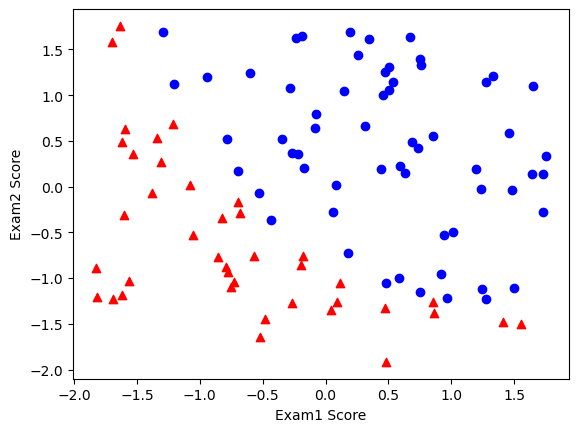

In [8]:
for i in range(len(df.index)):
    if y[i] == 1:
        plt.scatter(x_vec[i,1],x_vec[i,2],color='blue',marker='o')
    elif y[i] == 0:
        plt.scatter(x_vec[i,1],x_vec[i,2],color='red',marker='^')
plt.xlabel('Exam1 Score')
plt.ylabel('Exam2 Score')
plt.show()

In [9]:
# Fitting into Logistic Regression model

In [10]:
def sigmoidfnc(z):
    return 1 / (1 + np.exp(-z))

In [11]:
def costfnc(y,h):
    return (-y * np.log(h) - (1 - y) * np.log(1 - h)).mean()

In [12]:
def gradientfnc(x_vec, y, h):
    return np.dot(x_vec.T,(h - y)) / x_vec.shape[0]

In [13]:
# 1. Algorithm of Gradient Descent
lr = 0.001
epochs = 50000
theta_vec = np.zeros(x_vec.shape[1])
m = len(df.index)
cost_list = []

In [14]:
for i in range(epochs):
    h = sigmoidfnc(np.dot(x_vec,theta_vec))
    cost = costfnc(y,h)
    cost_list.append(cost)
    theta_vec = theta_vec - lr * gradientfnc(x_vec,y,h)

print('cost = ', cost)

## TypeError: 'numpy.float64' object is not callable
## You can't use the same variable name for a function and a float (in the same namespace)
## Try to name the function as ~~~fnc for its name!!!

cost =  0.224725387941092


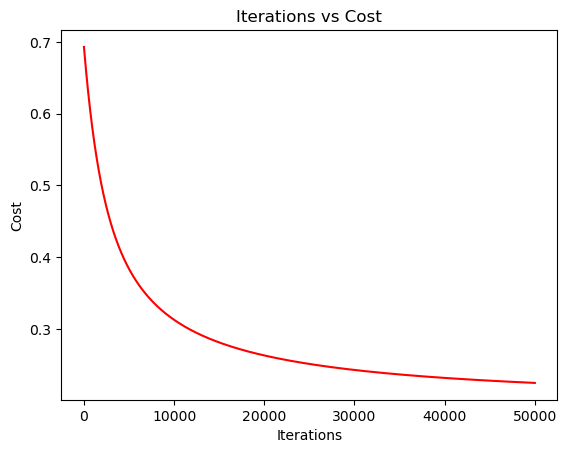

In [15]:
plt.plot(np.arange(epochs),cost_list, 'r')
plt.title('Iterations vs Cost')
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.show()

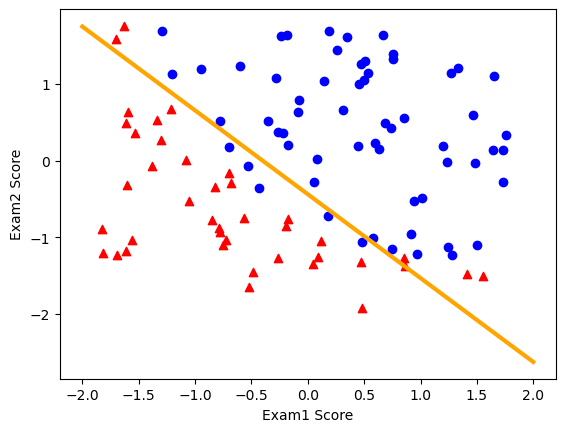

In [16]:
plot_x = np.linspace(-2,2)
plot_y = (-theta_vec[1] / theta_vec[2]) * plot_x + (-theta_vec[0] / theta_vec[2])
for i in range(len(df.index)):
    if y[i] == 1:
        plt.scatter(x_vec[i,1],x_vec[i,2],color='blue',marker='o')
    elif y[i] == 0:
        plt.scatter(x_vec[i,1],x_vec[i,2],color='red',marker='^')
plt.plot(plot_x,plot_y,color='orange',linewidth='3.0')
plt.xlabel('Exam1 Score')
plt.ylabel('Exam2 Score')
plt.show()

In [18]:
# 2. Using scikit-learn
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [19]:
X = df.drop(labels='Admission',axis=1)
y = df['Admission']
logreg.fit(X,y)

LogisticRegression()

In [20]:
from sklearn.metrics import mean_squared_error
hypothesis = logreg.predict(X)
print('cost = ',mean_squared_error(hypothesis,y))

cost =  0.11
